In [5]:
import pandas as pd
import os
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

# Restaurant Recommendation System

Welcome to this Jupyter notebook, where I will develop a restaurant recommendation system using collaborative filtering techniques. In this notebook, I will analyze the YELP dataset and answer the business question of how we can enhance user experience and satisfaction by suggesting personalized restaurant choices.



## Introduction to the Dataset

Before to dive into building the recommendation system, I will explore the YELP dataset. The dataset contains information about restaurants, user reviews, ratings, and more. By understanding the dataset, we can gain insights into user preferences and patterns in restaurant choices.

## Reading the Datasets

In this section, I will read the necessary datasets for  analysis. The Yelp dataset consists of multiple files in JSON format. I will load each dataset file individually and store the data in appropriate data structures for further processing.

### Dataset 1: Business Data

The first dataset we need to read is the 'yelp_academic_dataset_business.json' file, which contains information about different businesses. We will use the following code to read and parse the JSON data:

In [6]:
# Import the json module to handle JSON data
import json

# Create an empty list to store the loaded JSON objects
data_business = []

# Open the 'yelp_academic_dataset_business.json' file in read mode
# and iterate over each line in the file
with open('yelp_academic_dataset_business.json', 'r') as f:
    for line in f:
        try:
            # Load each line as a JSON object using json.loads()
            json_data = json.loads(line)
            
            # Append the JSON object to the data_business list
            data_business.append(json_data)
        except:
            # Handle any errors that occur during reading or parsing of the JSON data
            print('Error reading line:', line)

# Print the number of JSON objects loaded successfully
print(len(data_business), 'JSON objects loaded successfully')

150346 JSON objects loaded successfully


In [7]:
# Convert the list of dictionaries (data_business) into a DataFrame using pd.DataFrame()
df_business = pd.DataFrame(data_business)

# Print the first 5 rows of the DataFrame to inspect the data
print(df_business.head()) 

              business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   
2  32.223236 -110.880452    3.5            22        0   
3  39.9555

### Dataset 2: Checkin Data

The second dataset we need to read is the 'yelp_academic_dataset_checkin.json' file, which contains information about checkin dtaes. We will use the following code to read and parse the JSON data:

In [8]:
# Create an empty list to store the loaded JSON objects
data_checkin = []

with open('yelp_academic_dataset_checkin.json', 'r') as f:
    for line in f:
        try:
            json_data = json.loads(line)
            data_checkin.append(json_data)
        except:
            print('Error reading line:', line)

print(len(data_checkin), 'JSON objects loaded successfully')

131930 JSON objects loaded successfully


In [9]:
df_checkin = pd.DataFrame(data_checkin)
print(df_checkin.head())  # print the first 5 rows of data

              business_id                                               date
0  ---kPU91CF4Lq2-WlRu9Lw  2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020...
1  --0iUa4sNDFiZFrAdIWhZQ  2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011...
2  --30_8IhuyMHbSOcNWd6DQ           2013-06-14 23:29:17, 2014-08-13 23:20:22
3  --7PUidqRWpRSpXebiyxTg  2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012...
4  --7jw19RH9JKXgFohspgQw  2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014...


### Dataset 3: Review Data

The third dataset we need to read is the 'yelp_academic_dataset_review.json' file, which contains information about reviews. We will use the following code to read and parse the JSON data:

In [10]:
# Create an empty list to store the loaded JSON objects
data_review = []

with open('yelp_academic_dataset_review.json', 'r') as f:
    for line in f:
        try:
            json_data = json.loads(line)
            data_review.append(json_data)
        except:
            print('Error reading line:', line)

print(len(data_review), 'JSON objects loaded successfully')

6990280 JSON objects loaded successfully


In [11]:
df_review = pd.DataFrame(data_review)
print(df_review.head())  # print the first 5 rows of data

                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0    3.0       0      0     0   
1    5.0       1      0     1   
2    3.0       0      0     0   
3    5.0       1      0     1   
4    4.0       1      0     1   

                                                text                 date  
0  If you decide to eat here, just be aware it is...  2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year...  2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm...  2014-02-05 20:30:30  
3  Wow!  Yummy, different,  delici

### Dataset 4: Tip Data

The forth dataset we need to read is the 'yelp_academic_dataset_tip.json' file. We will use the following code to read and parse the JSON data:

In [12]:
# Create an empty list to store the loaded JSON objects
data_tip = []

with open('yelp_academic_dataset_tip.json', 'r') as f:
    for line in f:
        try:
            json_data = json.loads(line)
            data_tip.append(json_data)
        except:
            print('Error reading line:', line)

print(len(data_tip), 'JSON objects loaded successfully')

908915 JSON objects loaded successfully


In [13]:
df_tip = pd.DataFrame(data_tip)
print(df_tip.head())  # print the first 5 rows of data

                  user_id             business_id  \
0  AGNUgVwnZUey3gcPCJ76iw  3uLgwr0qeCNMjKenHJwPGQ   
1  NBN4MgHP9D3cw--SnauTkA  QoezRbYQncpRqyrLH6Iqjg   
2  -copOvldyKh1qr-vzkDEvw  MYoRNLb5chwjQe3c_k37Gg   
3  FjMQVZjSqY8syIO-53KFKw  hV-bABTK-glh5wj31ps_Jw   
4  ld0AperBXk1h6UbqmM80zw  _uN0OudeJ3Zl_tf6nxg5ww   

                                                text                 date  \
0                     Avengers time with the ladies.  2012-05-18 02:17:21   
1  They have lots of good deserts and tasty cuban...  2013-02-05 18:35:10   
2             It's open even when you think it isn't  2013-08-18 00:56:08   
3                          Very decent fried chicken  2017-06-27 23:05:38   
4             Appetizers.. platter special for lunch  2012-10-06 19:43:09   

   compliment_count  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  


### Dataset 5: User Data

The fivth dataset we need to read is the 'yelp_academic_dataset_user.json' file, which contains information about users. We will use the following code to read and parse the JSON data:

In [14]:
# Create an empty list to store the loaded JSON objects
data_user = []

with open('yelp_academic_dataset_user.json', 'r') as f:
    for line in f:
        try:
            json_data = json.loads(line)
            data_user.append(json_data)
        except:
            print('Error reading line:', line)

print(len(data_user), 'JSON objects loaded successfully')

1987897 JSON objects loaded successfully


In [15]:
df_user = pd.DataFrame(data_user)
print(df_user.head())  # print the first 5 rows of data

                  user_id    name  review_count        yelping_since  useful  \
0  qVc8ODYU5SZjKXVBgXdI7w  Walker           585  2007-01-25 16:47:26    7217   
1  j14WgRoU_-2ZE1aw1dXrJg  Daniel          4333  2009-01-25 04:35:42   43091   
2  2WnXYQFK0hXEoTxPtV2zvg   Steph           665  2008-07-25 10:41:00    2086   
3  SZDeASXq7o05mMNLshsdIA    Gwen           224  2005-11-29 04:38:33     512   
4  hA5lMy-EnncsH4JoR-hFGQ   Karen            79  2007-01-05 19:40:59      29   

   funny   cool                                              elite  \
0   1259   5994                                               2007   
1  13066  27281  2009,2010,2011,2012,2013,2014,2015,2016,2017,2...   
2   1010   1003                           2009,2010,2011,2012,2013   
3    330    299                                     2009,2010,2011   
4     15      7                                                      

                                             friends  fans  ...  \
0  NSCy54eWehBJyZdG2iE84w, pe42

## Business Question: How can a restaurant recommendation system enhance user experience and satisfaction by suggesting personalized restaurant choices?

In this analysis, my main objective is to address the following business question:

How can a restaurant recommendation system enhance user experience and satisfaction by suggesting personalized restaurant choices?

### Justification for Dataset Focus

To answer the above business question, I will focus the analysis on three key datasets from the Yelp dataset. These datasets have been selected based on their relevance to the business question and their potential to provide meaningful insights. The chosen datasets are as follows:

1. Business Dataset: This dataset provides information about different businesses, including restaurants. It includes details such as business name, address, location, and attributes. I will use this dataset to identify restaurants with the highest ratings and positive reviews.

2. Review Dataset: This dataset contains user reviews and ratings for various businesses, including restaurants. It will help to analyze users' past restaurant reviews, ratings, and preferences.

3. User Dataset: This dataset contains information about users, including their profiles and activities on the platform. It includes details such as user ID, name, review count, and other relevant information. I will use this dataset to analyze user preferences and patterns in restaurant choices.

By combining and analyzing these three datasets, I can gather comprehensive insights into the business question. The selected datasets provide a rich source of information that covers various aspects related to the business question.

Next, I will proceed with data cleaning, exploratory data analysis, and feature engineering on the selected datasets to extract valuable insights that will help us answer the sub-questions and ultimately address the business question.


###  Sub-questions:

1. What are the user preferences and patterns in restaurant choices?
2. Which restaurants have the highest ratings and positive reviews?
3. How can we leverage collaborative filtering (KNN) to recommend similar restaurants based on user preferences?
4. How can we utilize matrix factorization (SVD) to provide personalized restaurant recommendations?
5. How can we evaluate the performance of the recommender system?        

###  Data cleaning and EDA


As the dataset is huge, we only took 100K samples of the observations from each dataset (businesses, users and reviews) to perform the initial EDA.

In [16]:
df_business_sample = df_business.sample(n=100000, random_state=42)
df_user_sample = df_user.sample(n=100000, random_state=42)
df_review_sample = df_review.sample(n=100000, random_state=42)

In [17]:
# Check for missing values
print(df_business_sample.isnull().sum())

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes       9111
categories         68
hours           15561
dtype: int64


In [18]:
# Handle missing values
# For columns with a significant number of missing values, dropping the column 
# Remove irrelevant or redundant features
df_business_sample = df_business_sample.drop(['address', 'postal_code',  'is_open','attributes','hours' ], axis=1)

In [19]:
unique_categories = df_business_sample['categories'].unique()
print(unique_categories)

['Education, Elementary Schools, Child Care & Day Care, Local Services, Preschools, Montessori Schools'
 'Hair Salons, Beauty & Spas, Hair Stylists, Skin Care, Blow Dry/Out Services, Makeup Artists'
 'Gun/Rifle Ranges, Active Life' ...
 'American (Traditional), Japanese, Buffets, Chinese, Restaurants, Food'
 'Home Services, Carpet Installation, Flooring, Building Supplies'
 'American (New), Ticket Sales, Performing Arts, Restaurants, Dinner Theater, Arts & Entertainment']


In [20]:
popular_categories = df_business_sample['categories'].value_counts().head(10)
print(popular_categories)

Beauty & Spas, Nail Salons    665
Nail Salons, Beauty & Spas    609
Restaurants, Pizza            606
Pizza, Restaurants            559
Restaurants, Mexican          504
Restaurants, Chinese          470
Mexican, Restaurants          457
Chinese, Restaurants          432
Food, Coffee & Tea            333
Beauty & Spas, Hair Salons    328
Name: categories, dtype: int64


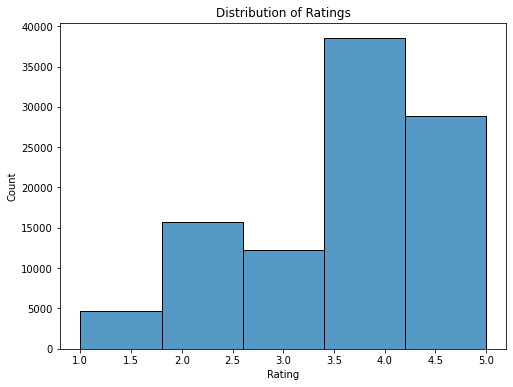

In [21]:
# Plot a histogram of ratings
plt.figure(figsize=(8, 6))
sns.histplot(data=df_business_sample, x='stars', bins=5)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

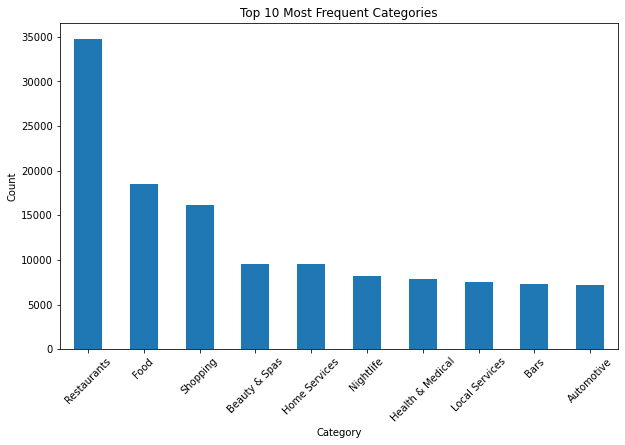

In [22]:
# Split the categories column into a list of categories
df_business_sample['categories'] = df_business_sample['categories'].str.split(',')

# Count the occurrences of each category
category_counts = df_business_sample['categories'].explode().str.strip().value_counts()

# Plot the top 10 most frequent categories
plt.figure(figsize=(10, 6))
category_counts.head(10).plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Top 10 Most Frequent Categories')
plt.xticks(rotation=45)
plt.show()

# Q1 What are the user preferences and patterns in restaurant choices?

###  Filtering data
Getting reaturants out of business dataframe based on Restaurants category

I filtered it down to the restaurants by selecting businesses based on category Restaurants for review/user I only included the data which was for the restaurants in the sample.

In [23]:
df_business_sample['categories'] = df_business_sample['categories'].astype(str)
restaurant_df = df_business_sample[df_business_sample['categories'].str.contains('Restaurants')==True]

In [24]:
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34791 entries, 99277 to 132434
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   34791 non-null  object 
 1   name          34791 non-null  object 
 2   city          34791 non-null  object 
 3   state         34791 non-null  object 
 4   latitude      34791 non-null  float64
 5   longitude     34791 non-null  float64
 6   stars         34791 non-null  float64
 7   review_count  34791 non-null  int64  
 8   categories    34791 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 2.7+ MB


In [25]:
print(restaurant_df.head())

                  business_id                     name          city state  \
99277  6XOn1p3sbO22UjJGpmCgxg                China Wok   Saint Louis    MO   
78120  bNBi-RVlx71bugXY0GRLtQ        Chestnut St. Cafe  Philadelphia    PA   
80328  rbPK4jSyFS10zhWYvo_Srg  Cafe Porche and snowbar   New Orleans    LA   
15962  thpDDcdKLPzSFldLLBULLA        Callahan's Corner          Troy    IL   
29789  udjadmbL9mx5VXb7sKOdWg                   Subway      Metairie    LA   

        latitude  longitude  stars  review_count  \
99277  38.486761 -90.304813    4.5            20   
78120  39.956725 -75.209925    4.5            34   
80328  29.939316 -90.078939    5.0           172   
15962  38.732934 -89.915969    3.0            10   
29789  30.001684 -90.124813    2.5             7   

                                              categories  
99277                        ['Restaurants', ' Chinese']  
78120  ['Food', ' Bubble Tea', ' Restaurants', ' Sand...  
80328  ['Food', ' Shaved Ice', ' Cajun/Cr

In [26]:
# Check for missing values
print(df_user_sample.isnull().sum())

user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64


In [27]:
# Remove irrelevant or redundant features
df_user_sample = df_user_sample.drop(['yelping_since', 'friends',  'fans','compliment_hot','compliment_more','compliment_profile', 'compliment_cute','compliment_list', 'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_funny', 'compliment_writer', 'compliment_photos'  ], axis=1)

In [28]:
print(df_user_sample.head())

                        user_id     name  review_count  useful  funny  cool  \
1635733  QQaKfSyWbzZTVqUuIoefow   Corrin             2       4      1     0   
1563281  epRxgIf-3HAJggkp4OSFtA     Lois             1       1      0     0   
4352     dkcKCYISLc9nGfgMJ5ZitA  Desiree            26      18      0     3   
1336240  yUyveO0V0BxSklVauJvD0g     Gary             1       1      0     1   
1337407  txOVgP4grDuL2PjbQX3Bxw   Shawne             2       0      0     0   

        elite  average_stars  
1635733                 5.00  
1563281                 5.00  
4352                    4.81  
1336240                 2.00  
1337407                 4.00  


In [29]:
df_user_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1635733 to 865539
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user_id        100000 non-null  object 
 1   name           100000 non-null  object 
 2   review_count   100000 non-null  int64  
 3   useful         100000 non-null  int64  
 4   funny          100000 non-null  int64  
 5   cool           100000 non-null  int64  
 6   elite          100000 non-null  object 
 7   average_stars  100000 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 6.9+ MB


In [30]:
# Check for missing values
print(df_review_sample.isnull().sum())

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64


In [31]:
# Remove irrelevant or redundant features
df_review_sample = df_review_sample.drop(['useful', 'funny',  'cool'], axis=1)

In [32]:
df_review_sample['text'] = df_review_sample['text'].astype(str)

In [33]:
df_review_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1295256 to 4178480
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_id    100000 non-null  object 
 1   user_id      100000 non-null  object 
 2   business_id  100000 non-null  object 
 3   stars        100000 non-null  float64
 4   text         100000 non-null  object 
 5   date         100000 non-null  object 
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [34]:
print(df_review_sample.head())

                      review_id                 user_id  \
1295256  J5Q1gH4ACCj6CtQG7Yom7g  56gL9KEJNHiSDUoyjk2o3Q   
3297618  HlXP79ecTquSVXmjM10QxQ  bAt9OUFX9ZRgGLCXG22UmA   
1217795  JBBULrjyGx6vHto2osk_CQ  NRHPcLq2vGWqgqwVugSgnQ   
3730348  U9-43s8YUl6GWBFCpxUGEw  PAxc0qpqt5c2kA0rjDFFAg   
1826590  8T8EGa_4Cj12M6w8vRgUsQ  BqPR1Dp5Rb_QYs9_fz9RiA   

                    business_id  stars  \
1295256  8yR12PNSMo6FBYx1u5KPlw    2.0   
3297618  pBNucviUkNsiqhJv5IFpjg    5.0   
1217795  8sf9kv6O4GgEb0j1o22N1g    5.0   
3730348  XwepyB7KjJ-XGJf0vKc6Vg    4.0   
1826590  prm5wvpp0OHJBlrvTj9uOg    5.0   

                                                      text  \
1295256  Went for lunch and found that my burger was me...   
3297618  I needed a new tires for my wife's car. They h...   
1217795  Jim Woltman who works at Goleta Honda is 5 sta...   
3730348  Been here a few times to get some shrimp.  The...   
1826590  This is one fantastic place to eat whether you...   

                   

The sample data was observed to be clean and I will merge the dataset based on unique keys.

In [35]:
complete_df = restaurant_df.merge(df_review_sample,on='business_id').merge(df_user_sample,on='user_id')

In [36]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2211
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   business_id     2212 non-null   object 
 1   name_x          2212 non-null   object 
 2   city            2212 non-null   object 
 3   state           2212 non-null   object 
 4   latitude        2212 non-null   float64
 5   longitude       2212 non-null   float64
 6   stars_x         2212 non-null   float64
 7   review_count_x  2212 non-null   int64  
 8   categories      2212 non-null   object 
 9   review_id       2212 non-null   object 
 10  user_id         2212 non-null   object 
 11  stars_y         2212 non-null   float64
 12  text            2212 non-null   object 
 13  date            2212 non-null   object 
 14  name_y          2212 non-null   object 
 15  review_count_y  2212 non-null   int64  
 16  useful          2212 non-null   int64  
 17  funny           2212 non-null   i

In [37]:
print(complete_df.head())

              business_id                  name_x          city state  \
0  twficKhd2QU0N2oEraX4nw         Taste of Europe  Indianapolis    IN   
1  nuZm_f6EzuJTu3iT_b6DGw  Applebee's Grill + Bar         Largo    FL   
2  XgnArX8m2BaGtpJp5Mx2qg             King Market       Antioch    TN   
3  STj3aVLhaVEM8prvNhzPnQ  Astoria Russian Bistro   Saint Louis    MO   
4  o0Ue_ISOjiM6HWByhYOcqQ     Little Philadelphia        Sparks    NV   

    latitude   longitude  stars_x  review_count_x  \
0  39.926638  -86.233845      4.0              35   
1  27.871699  -82.761946      2.0              53   
2  36.071200  -86.685411      4.5             380   
3  38.682904  -90.477598      3.5              67   
4  39.550447 -119.752808      3.5              91   

                                          categories               review_id  \
0  ['Food', ' Specialty Food', ' Ethnic Food', ' ...  Ts8495QRrIAY1KaIBOWQWA   
1  ['American (Traditional)', ' Nightlife', ' Bar...  UrD7FWdQdJJqMuyRtdDVTg   
2 

In [69]:
complete_df.head()

,business_id,name_x,city,state,latitude,longitude,stars_x,review_count_x,categories,review_id,...,stars_y,text,date,name_y,review_count_y,useful,funny,cool,elite,average_stars
0,twficKhd2QU0N2oEraX4nw,Taste of Europe,Indianapolis,IN,39.926638,-86.233845,4.0,35,"['Food', ' Specialty Food', ' Ethnic Food', ' ...",Ts8495QRrIAY1KaIBOWQWA,...,4.0,My wife and I stumbled upon this place by acci...,2013-03-23 08:41:00,Michael,16,18,6,3,,2.56
1,nuZm_f6EzuJTu3iT_b6DGw,Applebee's Grill + Bar,Largo,FL,27.871699,-82.761946,2.0,53,"['American (Traditional)', ' Nightlife', ' Bar...",UrD7FWdQdJJqMuyRtdDVTg,...,5.0,"Good value, friendly and good service - will c...",2018-01-30 17:43:08,Wendel,90,83,12,11,,3.40
2,XgnArX8m2BaGtpJp5Mx2qg,King Market,Antioch,TN,36.071200,-86.685411,4.5,380,"['Food', ' Laotian', ' Asian Fusion', ' Thai',...",5MWT6QfXzY30DcxD80fBww,...,4.0,"This was quite an experience, in many ways. I...",2017-06-05 04:10:19,Zee,132,286,108,116,,3.86
3,STj3aVLhaVEM8prvNhzPnQ,Astoria Russian Bistro,Saint Louis,MO,38.682904,-90.477598,3.5,67,"['Nightlife', ' Restaurants', ' Bars', ' Russi...",dEchA0oTrPhpKWSuAJuS1g,...,4.0,"My cousin, brother, and I tried them out. Now...",2011-09-02 02:12:49,Zee,132,286,108,116,,3.86
4,o0Ue_ISOjiM6HWByhYOcqQ,Little Philadelphia,Sparks,NV,39.550447,-119.752808,3.5,91,"['Cheesesteaks', ' Restaurants', ' American (T...",lWqDy-xl8NKzRS6ClfLS2g,...,4.0,Decided to try this spot out after getting a c...,2018-12-22 01:03:30,John,15,22,2,4,,4.53


In [39]:
complete_df.describe()

,latitude,longitude,stars_x,review_count_x,stars_y,review_count_y,useful,funny,cool,average_stars
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,35.686211,-88.897201,3.776447,514.327758,3.766275,116.195750,391.179024,175.968807,273.750452,3.786637
std,5.334639,14.035027,0.646356,925.418717,1.405257,252.947516,2468.645562,1450.145324,2212.981634,0.787408
min,27.690565,-120.026076,1.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,29.956231,-90.212373,3.500000,94.000000,3.000000,8.000000,4.000000,0.000000,1.000000,3.440000
50%,38.570349,-86.158317,4.000000,225.000000,4.000000,26.000000,20.000000,4.000000,5.000000,3.890000
75%,39.940791,-75.517786,4.000000,521.250000,5.000000,100.250000,116.250000,24.000000,43.000000,4.280000
max,53.625804,-74.699842,5.000000,7568.000000,5.000000,2899.000000,40034.000000,23181.000000,35684.000000,5.000000


###  EDA

Performing Exploratory data analysis

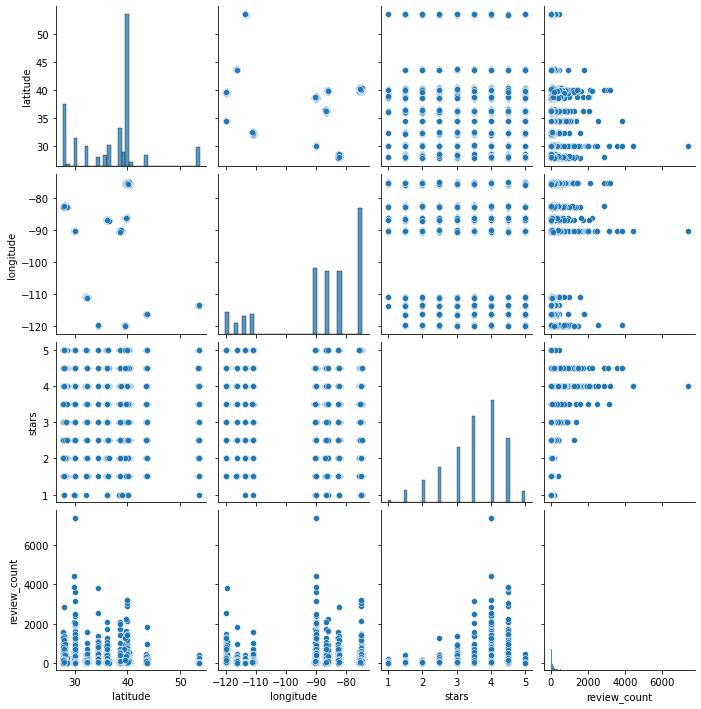

In [40]:
sns.pairplot(restaurant_df.iloc[0:10000,:]);

# Distribution count of Restaurant rating
We can see below more restaurants get 4 rating than other ratings

c:\Users\olgal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


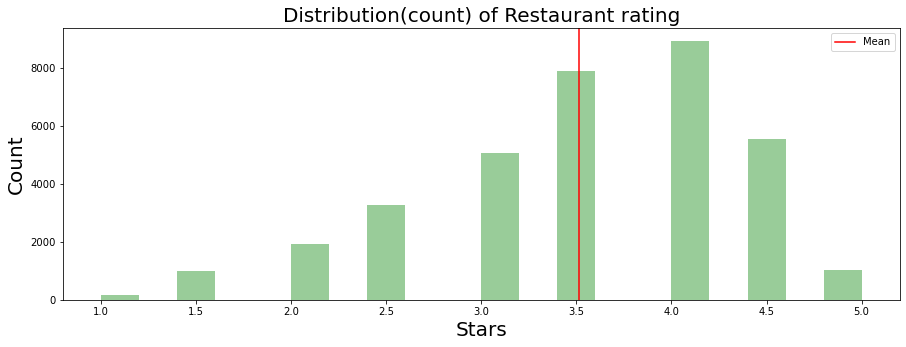

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

sns.distplot(restaurant_df.stars,kde=False,color = 'g',ax =ax,bins=20);
ax.axvline(restaurant_df.stars.mean(), 0, 1, color='r', label='Mean')
ax.legend();
ax.set_ylabel('Count',size=20)
ax.set_xlabel('Stars',size=20)
ax.set_title('Distribution(count) of Restaurant rating',size=20);

# Distribution count of Reviews rating for restaurants
We can see below more reviews have 5 rating than other ratings

c:\Users\olgal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


Text(0.5, 1.0, 'Distribution(count) of different Reviews rating')

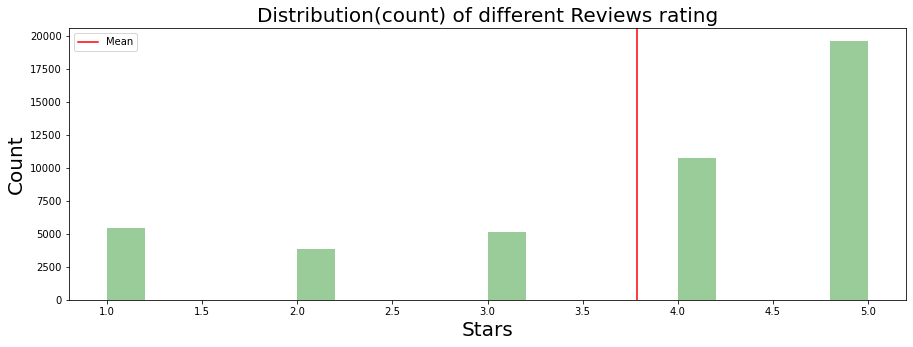

In [42]:
#review just for business which are restautrant
review_df_filter_df = df_review_sample.merge(restaurant_df,how='inner',on='business_id')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
sns.distplot(review_df_filter_df.stars_x,kde=False,color = 'g',ax =ax,bins=20);
ax.axvline(review_df_filter_df.stars_x.mean(), 0, 1, color='r', label='Mean')
ax.legend();
ax.set_ylabel('Count',size=20)
ax.set_xlabel('Stars',size=20)
ax.set_title('Distribution(count) of different Reviews rating',size=20)

# Distribution count of user rating for restaurants
We can see below users have around mean of 4.1 rating

c:\Users\olgal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


Text(0.5, 1.0, 'Distribution(count) of User given rating')

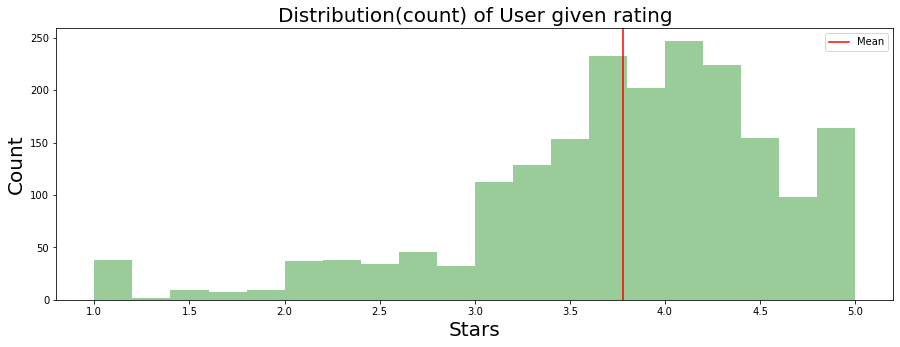

In [43]:
#user just for business which are restautrant
user_df_filter_df = complete_df.groupby(['user_id'],as_index=False).mean()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
sns.distplot(user_df_filter_df.average_stars,kde=False,color = 'g',ax =ax,bins=20);
ax.axvline(user_df_filter_df.average_stars.mean(), 0, 1, color='r', label='Mean')
ax.legend();
ax.set_ylabel('Count',size=20)
ax.set_xlabel('Stars',size=20)
ax.set_title('Distribution(count) of User given rating',size=20)

###  Most Reviewed Restaurant
Acme Oyster House is most reviewed restaurant

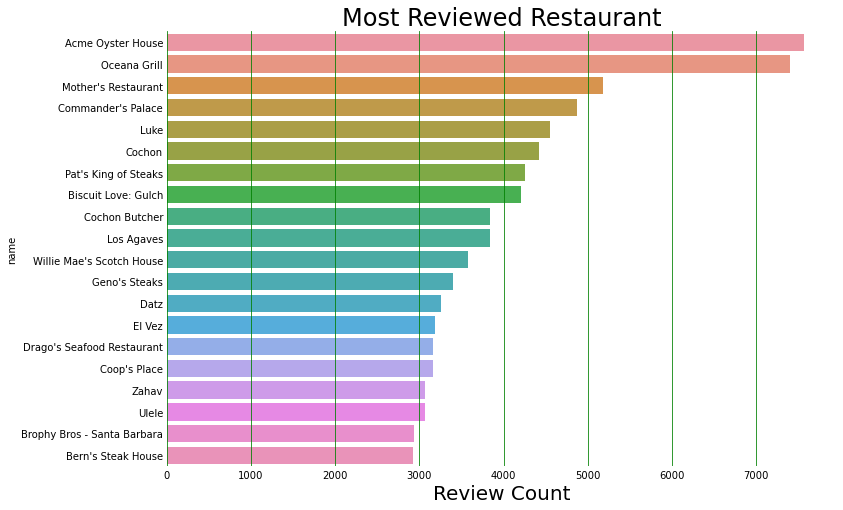

In [44]:
#get top 20 most reviewed restaurants
n_top =20
most_reviewed_restaurant = restaurant_df.nlargest(n_top, 'review_count')
fig, ax = plt.subplots()
ax = sns.barplot(y="name", x="review_count", data=most_reviewed_restaurant)
ax.set_xlabel('Review Count',size=20)
fig.set_size_inches(12, 8)
plt.title("Most Reviewed Restaurant",fontsize=24);
ax.grid(axis = 'x', color ='green', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
sns.despine(left=True, bottom=True)

# Top 10 5 star rated Restaurant
Blues City Deli is the top 5 star rated restaurant

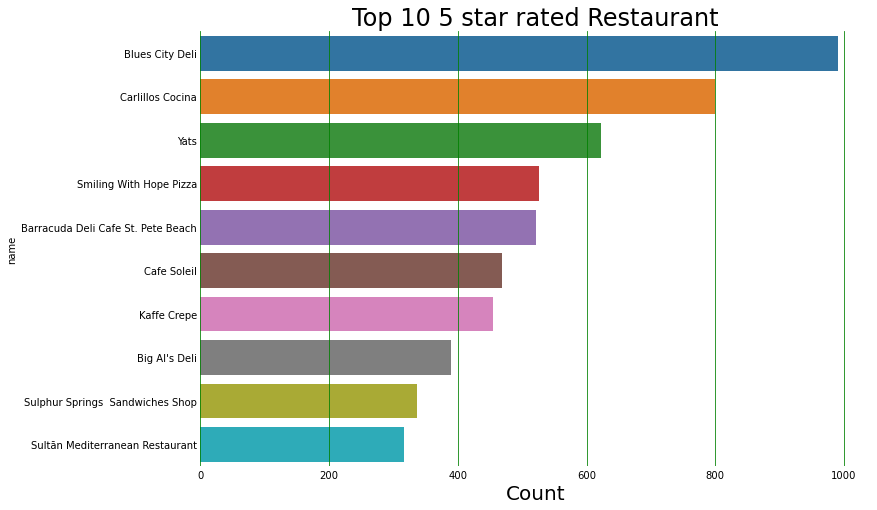

In [45]:
top_rated_restaurant = restaurant_df.sort_values(by=['stars','review_count'],
                                                 ascending=False)[['name','business_id','review_count','stars']]
#get top 10 5 star rated restaurant
n_top =10
top_rated_restaurant = top_rated_restaurant.nlargest(n_top, 'stars')
fig, ax = plt.subplots()
ax = sns.barplot(y="name", x="review_count", data=top_rated_restaurant)
ax.set_xlabel('Count',size=20)
fig.set_size_inches(12, 8)
plt.title("Top 10 5 star rated Restaurant",fontsize=24);
ax.grid(axis = 'x', color ='green', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
sns.despine(left=True, bottom=True)

Top 10 users who reviewed Restaurant

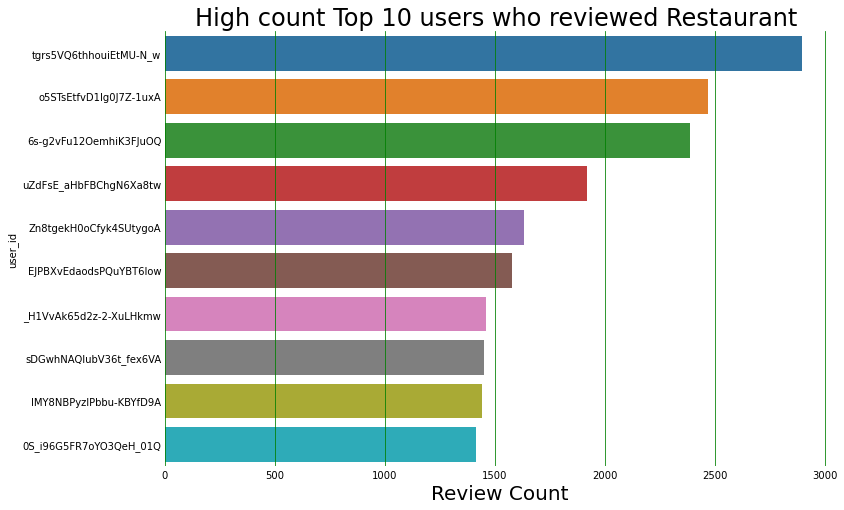

In [46]:
#get top 10 most reviewing users
n_top =10
most_review_user = user_df_filter_df.nlargest(n_top, 'review_count_y').reindex()
fig, ax = plt.subplots()
ax = sns.barplot(y="user_id", x="review_count_y", data=most_review_user)
ax.set_xlabel('Review Count',size=20)
fig.set_size_inches(12, 8)
plt.title("High count Top 10 users who reviewed Restaurant ",fontsize=24);
ax.grid(axis = 'x', color ='green', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
sns.despine(left=True, bottom=True)

### Q1 What are the user preferences and patterns in restaurant choices? 



In [47]:
average_ratings = complete_df.groupby('name_x')['stars_y'].mean()
highest_rated_restaurant = average_ratings.idxmax()
lowest_rated_restaurant = average_ratings.idxmin()
print("Highest rated restaurant:", highest_rated_restaurant)
print("Lowest rated restaurant:", lowest_rated_restaurant)

Highest rated restaurant: 1518 Bar & Grill
Lowest rated restaurant: 3 Sisters Café


In [48]:
# Identify popular categories or cuisines
categories_counts = complete_df['categories'].value_counts()
top_categories = categories_counts.head(5)
print("Top categories:")
print(top_categories)

Top categories:
['Mexican', ' Restaurants']    34
['Restaurants', ' Mexican']    30
['Restaurants', ' Pizza']      18
['Italian', ' Restaurants']    15
['Restaurants', ' Chinese']    14
Name: categories, dtype: int64


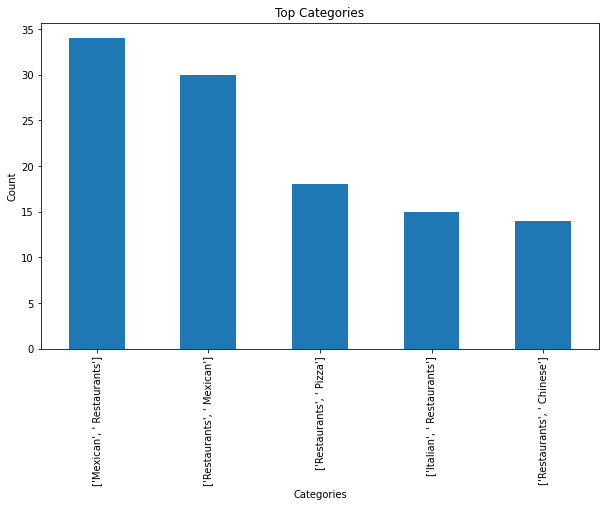

In [49]:
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Top Categories')
plt.show()

### Based on these results, we can conclude the following:

1. Mexican cuisine seems to be popular as it appears in the top two categories. This suggests that there is a high demand for Mexican restaurants or food among the users.

2. Pizza is also a popular category, appearing in the top three categories. This indicates a significant preference for pizza among the users.

3. Italian cuisine appears in the top five categories, specifically as 'Italian Restaurants'. This suggests that there is some level of interest in Italian cuisine among the users.

4. Chinese cuisine also appears in the top five categories. This indicates that there is a demand for Chinese restaurants or food among the users.

In [50]:
from textblob import TextBlob

# Explore review sentiments
sentiments = [TextBlob(review).sentiment.polarity for review in complete_df['text']]
positive_reviews = sum(sentiment > 0 for sentiment in sentiments)
negative_reviews = sum(sentiment < 0 for sentiment in sentiments)
neutral_reviews = len(sentiments) - positive_reviews - negative_reviews
print("Positive reviews:", positive_reviews)
print("Negative reviews:", negative_reviews)
print("Neutral reviews:", neutral_reviews)

Positive reviews: 1942
Negative reviews: 257
Neutral reviews: 13


### We can draw the following conclusions:

1. Positive sentiment dominates: The majority of the reviews in the dataset have a positive sentiment. This indicates that users generally had a favorable experience and expressed positive opinions in their reviews.

2. Few negative reviews: Although the number of negative reviews is lower compared to positive reviews, they still provide valuable feedback on areas that may require improvement. Paying attention to the negative reviews can help identify specific aspects of the restaurant experience that users found unsatisfactory.

3. Neutral reviews: Neutral reviews indicate a lack of strong positive or negative sentiment. They might be more descriptive or provide a balanced view of the restaurant experience. However, since the number of neutral reviews is relatively small compared to positive reviews, they might not significantly impact overall user preferences and patterns.

### Q2  Which restaurants have the highest ratings and positive reviews?

In [51]:
# Sort the dataset by 'stars' column in descending order
top_rated_restaurants = complete_df.sort_values(by='stars_y', ascending=False)

# Filter restaurants with the highest ratings (e.g., top 10)
highest_rated = top_rated_restaurants.head(10)
highest_rated


,business_id,name_x,city,state,latitude,longitude,stars_x,review_count_x,categories,review_id,...,stars_y,text,date,name_y,review_count_y,useful,funny,cool,elite,average_stars
1106,gEX_kEhYgvLKGJtlY45BmQ,Rangoon Burmese Restaurant,Philadelphia,PA,39.953909,-75.154789,4.0,612,"['Burmese', ' Restaurants']",9ZEKrma_ow-f1bbFaNTmQg,...,5.0,My wife and I walked into this restaurant with...,2013-01-20 16:36:31,Amar,13,12,3,6,,4.15
759,26107Pz4hjESgQ8J2c81rA,Anise Global Gastrobar,Tampa,FL,27.949890,-82.460255,4.0,716,"['Restaurants', ' Gastropubs', ' Cocktail Bars...",FdDxKHbqJt6bM-EljvRbdw,...,5.0,It reminded me of every restaurant in New York...,2014-12-14 21:24:05,Launa,32,59,3,13,,3.88
742,n_fUROdhfmLwd_mpBi55ew,Central Grocery & Deli,New Orleans,LA,29.958831,-90.061072,4.5,1781,"['Delis', ' Sandwiches', ' Restaurants', ' Gro...",RP05bvQ8O7yX1RSj_0Fz_w,...,5.0,Nothing better than a muffuletta from Central ...,2019-02-23 04:26:03,Cindy,141,55,8,16,,4.57
743,j-qtdD55OLfSqfsWuQTDJg,Parc,Philadelphia,PA,39.949172,-75.170727,4.0,2761,"['Restaurants', ' French', ' Wine Bars', ' Nig...",IdWp76I7ivrelu_nTK5wtg,...,5.0,I've been to Parc before for dinner but was ju...,2019-12-29 02:25:40,Laura,134,202,42,76,"2017,2018,2019,20,20,2021",4.21
744,A6_LPH-NIunsga44vhPdbQ,BrickTop's,Nashville,TN,36.143846,-86.814481,4.0,381,"['Restaurants', ' American (New)']",taxP7O_OgsSzZb8T0CuptA,...,5.0,One of our consistent go-to's. Always good fo...,2020-06-19 23:56:49,G,4,1,0,0,,4.25
745,4UDm69SbXGjjlbVVy3GNcQ,Blue Bell Inn,Blue Bell,PA,40.152839,-75.266438,3.5,295,"['American (New)', ' American (Traditional)', ...",cTLrYYVqZgr-L6IX6xdRLg,...,5.0,My friends and I came here for a drink and wer...,2018-06-22 01:42:26,Don,7,2,0,0,,4.50
746,4UDm69SbXGjjlbVVy3GNcQ,Blue Bell Inn,Blue Bell,PA,40.152839,-75.266438,3.5,295,"['American (New)', ' American (Traditional)', ...",WuiZJUZQr1RzfPczQne4Kw,...,5.0,Love the place. The most beautiful out door s...,2019-09-23 15:01:33,Eatty,15,2,0,0,,3.60
749,GSOLNXG5-IPvNj0DPf3kOQ,Irene's,New Orleans,LA,29.954140,-90.066082,4.5,920,"['Italian', ' Restaurants']",dODuZU8Z-ilOONQTve776Q,...,5.0,One of my favorite restaurants in New Orleans....,2015-11-10 04:16:49,Dan,38,42,8,9,,3.53
750,GSOLNXG5-IPvNj0DPf3kOQ,Irene's,New Orleans,LA,29.954140,-90.066082,4.5,920,"['Italian', ' Restaurants']",3iLlO9qD0mqWMlyUR5-9sA,...,5.0,"Very professional, very well run restaurant. F...",2019-06-23 13:37:23,R.,349,396,214,98,,3.24
1578,_zzNQl6ImFw_B64cSdaoGA,Seabreeze Island Grill,Redington Shores,FL,27.829380,-82.830446,4.0,1108,"['Caribbean', ' American (Traditional)', ' Res...",3PaVfi2uJRPAtOkjmKU7Ww,...,5.0,Dined at Sea Breeze on New Years Eve. The foo...,2021-01-03 14:41:48,Kathleen,5,2,0,0,,5.00


### Based on the provided result of the most rated restaurants, we can conclude that the following restaurants have both high ratings and positive reviews:

1. Rangoon Burmese Restaurant in Philadelphia, PA: It has a rating of 4.0 and a review count of 612. People have positively reviewed the restaurant for its Burmese cuisine.

2. Anise Global Gastrobar in Tampa, FL: With a rating of 4.0 and a review count of 716, this restaurant has received positive reviews for its global cuisine, gastropub atmosphere, and cocktail bar.

3. Central Grocery & Deli in New Orleans, LA: This restaurant has a high rating of 4.5 and a substantial review count of 1781. Positive reviews highlight the exceptional muffuletta sandwiches and deli offerings.

These restaurants have garnered high ratings and positive feedback from customers, indicating that they are popular choices among the reviewers.

In [52]:
# Filter restaurants with a significant number of positive reviews (e.g., top 10)
positive_reviews = complete_df[complete_df['stars_y'] >= 4.0].head(10)
positive_reviews

,business_id,name_x,city,state,latitude,longitude,stars_x,review_count_x,categories,review_id,...,stars_y,text,date,name_y,review_count_y,useful,funny,cool,elite,average_stars
0,twficKhd2QU0N2oEraX4nw,Taste of Europe,Indianapolis,IN,39.926638,-86.233845,4.0,35,"['Food', ' Specialty Food', ' Ethnic Food', ' ...",Ts8495QRrIAY1KaIBOWQWA,...,4.0,My wife and I stumbled upon this place by acci...,2013-03-23 08:41:00,Michael,16,18,6,3,,2.56
1,nuZm_f6EzuJTu3iT_b6DGw,Applebee's Grill + Bar,Largo,FL,27.871699,-82.761946,2.0,53,"['American (Traditional)', ' Nightlife', ' Bar...",UrD7FWdQdJJqMuyRtdDVTg,...,5.0,"Good value, friendly and good service - will c...",2018-01-30 17:43:08,Wendel,90,83,12,11,,3.40
2,XgnArX8m2BaGtpJp5Mx2qg,King Market,Antioch,TN,36.071200,-86.685411,4.5,380,"['Food', ' Laotian', ' Asian Fusion', ' Thai',...",5MWT6QfXzY30DcxD80fBww,...,4.0,"This was quite an experience, in many ways. I...",2017-06-05 04:10:19,Zee,132,286,108,116,,3.86
3,STj3aVLhaVEM8prvNhzPnQ,Astoria Russian Bistro,Saint Louis,MO,38.682904,-90.477598,3.5,67,"['Nightlife', ' Restaurants', ' Bars', ' Russi...",dEchA0oTrPhpKWSuAJuS1g,...,4.0,"My cousin, brother, and I tried them out. Now...",2011-09-02 02:12:49,Zee,132,286,108,116,,3.86
4,o0Ue_ISOjiM6HWByhYOcqQ,Little Philadelphia,Sparks,NV,39.550447,-119.752808,3.5,91,"['Cheesesteaks', ' Restaurants', ' American (T...",lWqDy-xl8NKzRS6ClfLS2g,...,4.0,Decided to try this spot out after getting a c...,2018-12-22 01:03:30,John,15,22,2,4,,4.53
5,XkZVpfDiS_D-xDlqNhVTkg,Wawa,St. Petersburg,FL,27.781186,-82.715322,3.5,7,"['Gas Stations', ' Sandwiches', ' Convenience ...",jpVjQpLv0mfoX_GPi2zRZw,...,5.0,"so far, all WaWa are the same including out of...",2020-11-02 03:28:23,M,452,269,10,180,,3.92
7,F3bzaJzhvsWPD3JQYSqrwQ,La Teresita Restaurant,Pinellas Park,FL,27.837012,-82.728076,3.5,129,"['Restaurants', ' Spanish', ' Cuban']",4bTu8lT-KY9-ouSKFAwJZA,...,4.0,The service is good and food is decent. Noth...,2021-05-01 01:24:57,M,452,269,10,180,,3.92
8,4B-LMwZKXcvHNLHXgr9v_w,Wendy's,Palm Harbor,FL,28.062395,-82.707293,3.0,28,"['Fast Food', ' Restaurants', ' Burgers']",j1mOp0s34OvAUhtyrdsVzw,...,4.0,This must be one of the nicest fast food place...,2021-02-16 04:16:29,M,452,269,10,180,,3.92
9,iTbiFCjbYYHZsuNoGMhrhA,Egg Platter,Pinellas Park,FL,27.833280,-82.679870,2.5,60,"['Food', ' Restaurants', ' Breakfast & Brunch'...",WETSP6mZJDZshGvgLX53Ww,...,4.0,"A good decent diner, price is affordable and s...",2020-12-04 01:56:26,M,452,269,10,180,,3.92
10,96r6iyqbZo8OjJGAWbDgQw,Nori Thai,St Pete Beach,FL,27.743776,-82.751421,4.0,273,"['Restaurants', ' Thai', ' Sushi Bars']",WO9H3g199Jdl6EisUz2BsA,...,4.0,Update: They are opened for take only. The pr...,2020-04-21 01:55:02,M,452,269,10,180,,3.92



### These are the restaurants that have positive reviews:

1. Taste of Europe in Indianapolis, IN: This restaurant has a rating of 4.0 and a review count of 35. Positive reviews mention stumbling upon the place and enjoying the food.

2. Applebee's Grill + Bar in Largo, FL: With a rating of 2.0 and a review count of 53, this restaurant receives a positive review for its good value, friendly service, and intention to visit again.

3. King Market in Antioch, TN: This restaurant has a high rating of 4.5 and a review count of 380. Positive reviews highlight the unique experience, including the variety of Laotian, Asian Fusion, and Thai cuisine..

These restaurants have positive feedback from customers, indicating that they provide a satisfying dining experience.


These restaurants have high ratings (4.5 or 5.0) and relatively positive review counts. They are well-regarded by customers and have received favorable feedback.

# Q3 How can we leverage collaborative filtering (KNN) to recommend similar restaurants based on user preferences?

The code above demonstrates the steps involved in training a KNN-based collaborative filtering model, splitting the data into train/validation/test sets, and performing hyperparameter tuning using grid search.
Importing the necessary classes from the Surprise library. KNNBasic is the class representing the KNN algorithm, Reader is used to define the rating scale, and Dataset is used to load and manipulate the data.



Surprise is a Python scikit for building and analyzing recommender systems that deal with explicit rating data.The Surprise library is a Python library specifically designed for building and evaluating recommender systems. It provides a range of algorithms and evaluation metrics commonly used in collaborative filtering and matrix factorization-based recommendation systems.
In Python, we use library Surprise to find the best clustering model based on RMSE,MAE and fitted time.

In [53]:
from sklearn.model_selection import train_test_split
from surprise import KNNBasic, Reader, Dataset
from surprise.model_selection import GridSearchCV

# Create a reader object
reader = Reader(rating_scale=(1, 5))

# Load the data into Surprise Dataset format
data = Dataset.load_from_df(complete_df[['user_id', 'business_id', 'stars_y']], reader)

# Split the data into train/validation/test sets
train_data, test_data = train_test_split(complete_df, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)

# Load the train and validation data into Surprise Dataset format
train_dataset = Dataset.load_from_df(train_data[['user_id', 'business_id', 'stars_y']], reader)
val_dataset = Dataset.load_from_df(val_data[['user_id', 'business_id', 'stars_y']], reader)

# Define the parameter grid for hyperparameter tuning
param_grid = {'k': [10, 20, 30], 'sim_options': {'name': ['cosine', 'pearson']}}

# Perform GridSearchCV to find the best hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3)
gs.fit(data)

# Get the best RMSE score and hyperparameters
best_rmse = gs.best_score['rmse']
best_params = gs.best_params['rmse']


# Print the best RMSE  score
print("Best RMSE score:", gs.best_score['rmse'])

# Print the best parameters
print("Best parameters:", gs.best_params['rmse'])



Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Comput

 ### The output suggests that the algorithm has completed successfully, and the best set of hyperparameters has been determined based on the RMSE score. The chosen configuration for the KNN model is using a cosine similarity measure, considering 10 nearest neighbors, and user-based collaborative filtering.

Build and train the KNN model with the specified hyperparameters: The KNN model is instantiated with k=10 (number of nearest neighbors) and sim_options={'name': 'cosine', 'user_based': True} (using cosine similarity and user-based collaborative filtering). The model is then trained on the full training dataset using the fit() method.

Build the trainset: The build_full_trainset() method is called on the data object to construct the trainset. This trainset contains all the user-item ratings in the dataset and is used for training the KNN model.

Train the KNN model on the trainset: The KNN model is fitted on the trainset using the fit() method. This step trains the model by computing the similarity matrix based on the specified similarity measure (cosine similarity) and the user-based collaborative filtering approach.

Make predictions on the validation set: The val_dataset is converted into a testset using build_full_trainset().build_testset(), which contains all the user-item ratings in the validation set. The KNN model's test() method is then called to generate predictions for the validation set.

Calculate RMSE on the validation set: The accuracy.rmse() function is used to calculate the root mean squared error (RMSE) between the predicted ratings and the actual ratings in the validation set. The resulting RMSE value of 0.4524 indicates the average difference between the predicted ratings and the actual ratings in the validation set.

### Q5 How can we evaluate the performance of the recommender system? 

In [54]:
# Build and train the KNN model with the best hyperparameters 
knn_model = KNNBasic(k=10, sim_options={'name': 'cosine', 'user_based': True})

# Build the trainset
trainset = data.build_full_trainset()
knn_model.fit(trainset)

# Make predictions on the validation set
val_predictions = knn_model.test(val_dataset.build_full_trainset().build_testset())

from surprise import accuracy

# Calculate RMSE on the validation set
val_rmse = accuracy.rmse(val_predictions)


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.4524


The calculated RMSE value of 0.4524, which provides an evaluation of the model's performance on the validation set.

In [55]:
# Create a Surprise Dataset object for the test set
final_test_dataset = Dataset.load_from_df(test_data[['user_id', 'business_id', 'stars_y']], reader)

# Evaluate the final model on the test set
test_predictions = knn_model.test(final_test_dataset.build_full_trainset().build_testset())

# Calculate RMSE and MAE on the test set
test_rmse = accuracy.rmse(test_predictions)
test_mae = accuracy.mae(test_predictions)

RMSE: 0.4823
MAE:  0.1751


### The values of RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error) on the test set can provide insights into the performance of the collaborative filtering (KNN) model.

RMSE: 0.4823
RMSE measures the average difference between the predicted ratings and the actual ratings in the test set. A lower RMSE value indicates better accuracy, as it signifies smaller deviations between predicted and actual ratings. In this case, the RMSE of 0.4823 suggests that, on average, the model's predicted ratings deviate from the actual ratings by approximately 0.4823.

MAE: 0.1751
MAE represents the average absolute difference between the predicted ratings and the actual ratings in the test set. Similar to RMSE, a lower MAE value indicates better accuracy. The MAE of 0.1751 suggests that, on average, the model's predicted ratings differ from the actual ratings by approximately 0.1751 on an absolute scale.


To evaluate the performance of a recommender system, you can analyze the results obtained from different evaluation metrics such as RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error). Let's discuss what can be concluded from the given results for a KNN-based recommender system:

Validation Set RMSE: 0.4524: RMSE measures the average squared difference between the predicted ratings and the actual ratings on the validation set. In this case, the RMSE value of 0.4524 indicates that, on average, the recommender system's predicted ratings deviate from the actual ratings by approximately 0.4524 units. A lower RMSE value suggests better accuracy in predicting user preferences.

Test Set RMSE: 0.4823: Similar to the validation set RMSE, the test set RMSE measures the average squared difference between the predicted ratings and the actual ratings on the test set. The RMSE value of 0.4823 indicates the average prediction error on the unseen test data. It can be compared with the validation set RMSE to check if the performance of the recommender system is consistent across different datasets. If the test set RMSE is significantly higher than the validation set RMSE, it may suggest overfitting or poor generalization to unseen data.

MAE: 0.1751: MAE measures the average absolute difference between the predicted ratings and the actual ratings. The MAE value of 0.1751 indicates that, on average, the recommender system's predicted ratings deviate from the actual ratings by approximately 0.1751 units. Similar to RMSE, a lower MAE value suggests better accuracy in predicting user preferences.

Based on these results, we can conclude that the KNN-based recommender system performs reasonably well in terms of accuracy. The RMSE and MAE values indicate that the system's predictions are relatively close to the actual ratings on both the validation and test sets. However, it's important to note that the interpretation of these results may also depend on the specific context and requirements of the recommender system application.




Was this response better or worse?
Better
Worse
Same


Regenerate response

In [56]:
# Randomly select a user

import random

target_user = random.choice(complete_df['user_id'])

# Select a target user for recommendations
target_user_id = target_user

# Get the inner user id from the trainset
target_user_inner_id = trainset.to_inner_uid(target_user_id)

# Get the nearest neighbors (users) based on the target user
nearest_neighbors = knn_model.get_neighbors(target_user_inner_id, k=10)

# Convert inner ids back to actual user ids
nearest_neighbors_ids = [trainset.to_raw_uid(inner_id) for inner_id in nearest_neighbors]

# Get restaurant recommendations from the nearest neighbors
recommendations = []
for neighbor_id in nearest_neighbors_ids:
    neighbor_ratings = complete_df[complete_df['user_id'] == neighbor_id][['business_id', 'stars_y']]
    recommendations.extend(neighbor_ratings.values.tolist())

# Sort recommendations by ratings
recommendations.sort(key=lambda x: x[1], reverse=True)

# Extract recommended restaurant ids
recommended_restaurants = [rec[0] for rec in recommendations]

# Show recommended restaurants
for restaurant_id in recommended_restaurants:
    restaurant_info = complete_df[complete_df['business_id'] == restaurant_id][['name_x', 'city']]
    print(restaurant_info)

                   name_x   city
1  Applebee's Grill + Bar  Largo
  name_x            city
5   Wawa  St. Petersburg
         name_x   city
11  Green Lemon  Tampa
12  Green Lemon  Tampa
13  Green Lemon  Tampa
14  Green Lemon  Tampa
         name_x   city
11  Green Lemon  Tampa
12  Green Lemon  Tampa
13  Green Lemon  Tampa
14  Green Lemon  Tampa
      name_x   city
15  O Cocina  Tampa
            name_x   city
16  The Front Door  Boise
        name_x     city
2  King Market  Antioch
                   name_x         city
3  Astoria Russian Bistro  Saint Louis
                name_x    city
4  Little Philadelphia  Sparks
                   name_x           city
7  La Teresita Restaurant  Pinellas Park
    name_x         city
8  Wendy's  Palm Harbor
        name_x           city
9  Egg Platter  Pinellas Park
       name_x           city
10  Nori Thai  St Pete Beach
         name_x   city
11  Green Lemon  Tampa
12  Green Lemon  Tampa
13  Green Lemon  Tampa
14  Green Lemon  Tampa
         na

# SVD 
Latent factor models (SVD) are an alternative approach that tries to explain the ratings by characterizing both items and users on number of factors inferred from the ratings patterns. Latent factor models are based on matrix factorization which characterizes both items and users by vectors of factors inferred from item rating patterns. High correspondence between item and user factors leads to a recommendation.

Collaborative filtering is one of the recommendation systems to predict the interests of
users by examining the selections of the similar users. The underlying assumption is
that if person A agrees with person B on many subjects, A has a greater chance to share
the same opinions with B on other subjects, compared to those unrelated users
### Q4 How can we utilize matrix factorization (SVD) to provide personalized restaurant recommendations?


In [97]:
# Number of unique users nad restaurants
n_users = complete_df['user_id'].nunique()
n_restaurants = complete_df['business_id'].nunique()

print('Number of Unique Users: ', n_users)
print('Number of Restaurant: ',n_restaurants)

Number of Unique Users:  1968
Number of Restaurant:  1916


The SVD model is a matrix factorization-based collaborative filtering algorithm. It decomposes the user-item ratings matrix into lower-dimensional matrices to capture latent factors that represent user preferences and item characteristics. The model learns these latent factors during the training process.

By calling the fit() method, the SVD model learns the latent factors and optimizes the model parameters based on the training data. It uses techniques like stochastic gradient descent to minimize the prediction errors between the actual ratings and the ratings predicted by the model.

After training, the SVD model can be used to make predictions on new data or provide recommendations based on user preferences and item features.

In [57]:
from surprise import SVD
from surprise import accuracy

# Train the SVD model on the train dataset
svd_model = SVD()
svd_model.fit(train_dataset.build_full_trainset())

Make predictions on the validation set and calculate RMSE:

In [58]:
# Generate predictions on the validation set
val_predictions = svd_model.test(val_dataset.build_full_trainset().build_testset())

# Calculate RMSE on the validation set
val_rmse = accuracy.rmse(val_predictions)

RMSE: 1.4574


Evaluate the model on the test set

In [59]:
from surprise import Dataset

# Load the test data into Surprise Dataset format
test_dataset = Dataset.load_from_df(test_data[['user_id', 'business_id', 'stars_y']], reader)

# Generate predictions on the test set
test_predictions = svd_model.test(test_dataset.build_full_trainset().build_testset())

# Calculate RMSE on the test set
test_rmse = accuracy.rmse(test_predictions)

RMSE: 1.4789



From the given results for an SVD-based recommender system, the following conclusions can be drawn:

Validation Set RMSE: 1.4574: The RMSE value of 1.4574 on the validation set indicates that, on average, the predicted ratings by the SVD-based recommender system deviate from the actual ratings by approximately 1.4574 units. A lower RMSE value suggests better accuracy in predicting user preferences. However, in this case, the RMSE value is relatively high, indicating a higher level of prediction error.

Test Set RMSE: 1.4789: The test set RMSE measures the average squared difference between the predicted ratings and the actual ratings on the unseen test data. The RMSE value of 1.4789 indicates the average prediction error on the test set. It can be compared with the validation set RMSE to assess the generalization capability of the recommender system. If the test set RMSE is significantly higher than the validation set RMSE, it may indicate overfitting or poor performance on unseen data.

Overall, the results suggest that the SVD-based recommender system has a relatively high RMSE on both the validation and test sets. This indicates that the predictions made by the system have a significant deviation from the actual ratings

In [61]:
# Load the complete dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(complete_df[['user_id', 'business_id', 'stars_y']], reader)

# Build the trainset
trainset = data.build_full_trainset()

# Train the SVD model
svd_model = SVD()
svd_model.fit(trainset)

In [84]:
print(complete_df['user_id'])

0       5ipYymxrBr1jpoWrM4pHJw
1       Zi8JJ10DFlCDTXX1nN3AuA
2       Cy-ubQIPyioR0Q0Hyf8tWA
3       Cy-ubQIPyioR0Q0Hyf8tWA
4       G22ZGTtTl-q8Q_O7PjwGzA
                 ...          
2207    Nmbj6j8QOVoz1-IX6RMR5A
2208    1QyLAyQxOqu-KNCtw-oXWw
2209    OIkz_8vqbFG8wXTkSvMHaQ
2210    WCncB9OZTjmuWh7PS6gEWg
2211    eofDWMecLSrGwIZs10_1Cw
Name: user_id, Length: 2212, dtype: object


In [91]:
# select a user

target_user = '5ipYymxrBr1jpoWrM4pHJw'
target_user_id = target_user

Get the inner user id from the trainset:


In [92]:
target_user_inner_id = trainset.to_inner_uid(target_user_id)


Use the SVD model to get predicted ratings for all items:

In [93]:
item_ids = [trainset.to_raw_iid(i) for i in range(trainset.n_items)]
predictions = [svd_model.predict(target_user_inner_id, item_id).est for item_id in item_ids]

Sort the predictions in descending order

In [94]:
sorted_predictions = sorted(list(zip(item_ids, predictions)), key=lambda x: x[1], reverse=True)

Extract the recommended restaurant ids

In [95]:
recommended_restaurants = [item_id for item_id, _ in sorted_predictions]

In [96]:
# Retrieve the recommended restaurant details
recommended_restaurants_details = complete_df[complete_df['business_id'].isin(recommended_restaurants)]

# Display the recommended restaurants
for index, row in recommended_restaurants_details.iterrows():
    print("Restaurant: ", row['name_x'])
    print("City: ", row['city'])

Restaurant:  Taste of Europe
City:  Indianapolis
Restaurant:  Applebee's Grill + Bar
City:  Largo
Restaurant:  King Market
City:  Antioch
Restaurant:  Astoria Russian Bistro
City:  Saint Louis
Restaurant:  Little Philadelphia
City:  Sparks
Restaurant:  Wawa
City:  St. Petersburg
Restaurant:  Burger King
City:  Saint Petersburg
Restaurant:  La Teresita Restaurant
City:  Pinellas Park
Restaurant:  Wendy's
City:  Palm Harbor
Restaurant:  Egg Platter
City:  Pinellas Park
Restaurant:  Nori Thai
City:  St Pete Beach
Restaurant:  Green Lemon
City:  Tampa
Restaurant:  Green Lemon
City:  Tampa
Restaurant:  Green Lemon
City:  Tampa
Restaurant:  Green Lemon
City:  Tampa
Restaurant:  O Cocina
City:  Tampa
Restaurant:  The Front Door
City:  Boise
Restaurant:  Grimaldi's Pizzeria
City:  Tampa
Restaurant:  Akira Hibachi & Sushi Bar
City:  Riverview
Restaurant:  Tommy D's
City:  Wyndmoor
Restaurant:  Giuseppe's Pizza & Family Restaurant
City:  Willow Grove
Restaurant:  Island Buffet
City:  Reno
Restau

# Conclusion

The KNN-based recommender system performs better compared to the SVD-based recommender system. Here's a comparison of the evaluation metrics:

KNN:

1. Validation Set RMSE: 0.4524
2. Test Set RMSE: 0.4823
3. MAE: 0.1751


SVD:

1. Validation Set RMSE: 1.4574
2. Test Set RMSE: 1.4789

In terms of RMSE, the KNN-based system has significantly lower values on both the validation and test sets compared to the SVD-based system. A lower RMSE indicates better accuracy in predicting user preferences.

Additionally, the MAE (Mean Absolute Error) value of 0.1751 for the KNN-based system suggests that, on average, the absolute difference between the predicted and actual ratings is relatively low.

Based on these metrics, it can be concluded that the KNN-based recommender system is performing better in terms of predictive accuracy compared to the SVD-based system.

### A restaurant recommendation system can greatly enhance user experience and satisfaction by providing personalized restaurant choices. Here are some ways it can achieve this:

1. Personalization
2. Discovery of New Restaurants
3. Time and Effort Savings
4. Improved Decision Making
5. Confidence in Recommendations
6. Continuous Improvement

A  personalized restaurant recommendation system can enhance user experience and satisfaction by simplifying the decision-making process, introducing new dining options, and tailoring recommendations to individual preferences. It saves time and effort, boosts confidence in decision making, and fosters a sense of discovery and culinary exploration, ultimately leading to more enjoyable dining experiences for users.